# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [1]:
# Read data into a dataframe and call info()
    # Example call:
    # df = pd.DataFrame({"A":[1, 2, 3], "B":[4, 5, 6]})
    # df.info()

In [2]:
import pandas as pd
import seaborn as sns
games = pd.read_json('games.json')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97410 entries, 0 to 97409
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        97410 non-null  int64  
 1   name                      97404 non-null  object 
 2   release_date              97410 non-null  object 
 3   estimated_owners          97410 non-null  object 
 4   peak_ccu                  97410 non-null  int64  
 5   required_age              97410 non-null  int64  
 6   price                     97410 non-null  float64
 7   dlc_count                 97410 non-null  int64  
 8   main_description          92540 non-null  object 
 9   supported_languages       97410 non-null  object 
 10  full_audio_languages      97410 non-null  object 
 11  reviews                   10125 non-null  object 
 12  header_image              97410 non-null  object 
 13  website                   42737 non-null  object 
 14  suppor

In [4]:
len(games)

97410

# My Question

### Write your question here. Does the amount of positive votes correlate with the amount of user recomendations? If so how many recomendations is a game with 200 positive votes predicted to get and how accurate is this prediction? (something like that)

# My Analysis

<AxesSubplot:xlabel='positive', ylabel='recommendations'>

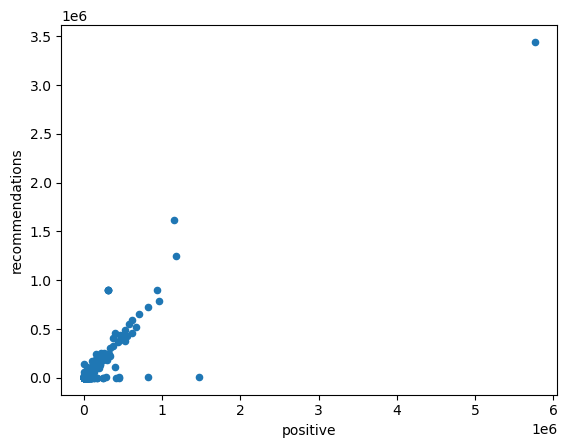

In [9]:
games.plot.scatter(x ='positive', y= 'recommendations', s=None, c=None)

In [10]:
def lsrl(data, expl, resp):
    m = data[expl].corr(data[resp]) * (data[resp].std() / data[expl].std())
    b = (data[resp].mean() - m * data[expl].mean())
    print(m , b)
    linearData = [data[expl].min(), m * data[expl].min() + b], [data[expl].max(), m * data[expl].max() + b]
    linearDf = pd.DataFrame(linearData, columns=['explanatory', 'response'])
    linearDf.head()
    sns.scatterplot(data= data, x= expl, y= resp)
    sns.lineplot(data = linearDf, x = 'explanatory', y = 'response')
    #return ("y =" + m + "x +" + b)
    return f"y = {m:f}x + {b:f}"

0.6596734728142168 130.49183778386805


'y = 0.659673x + 130.491838'

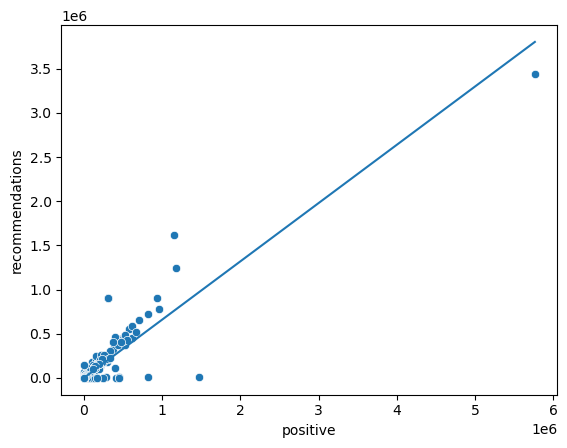

In [11]:
lsrl(games, "positive", "recommendations")

In [22]:
games["positive"].corr(games["recommendations"])

0.8971073279249456

In [23]:
games["positive"].corr(games["recommendations"]) * games["positive"].corr(games["recommendations"])

0.804801557816636

In [14]:
print(games['positive'].idxmax())
print(games['recommendations'].idxmax())

46158
46158


0.7770835187365241 41.47296135973454


'y = 0.777084x + 41.472961'

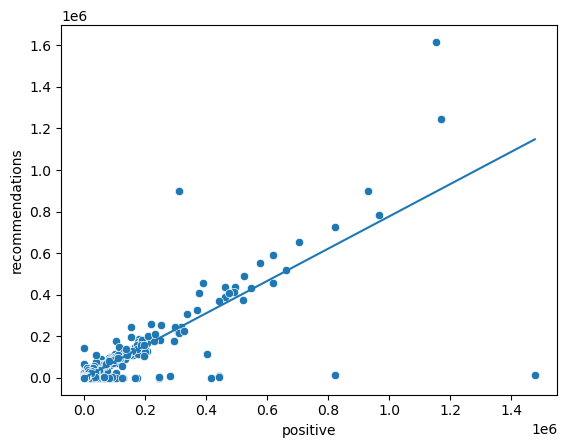

In [15]:
lsrl(cleanPosRec, "positive", "recommendations")

In [24]:
cleanPosRec["positive"].corr(cleanPosRec["recommendations"])

0.825555903235513

In [25]:
cleanPosRec["positive"].corr(cleanPosRec["recommendations"]) * cleanPosRec["positive"].corr(cleanPosRec["recommendations"])

0.6815425493670036

In [ ]:
# Analyze here

# My Answer

### The amount of positive votes has a strong positive linear relationship with the amount of user recommendations. A game with 200 positive votes is predicted to get either 262.4 or 196.9 user recommendations depending on whether we include the high leverage point in our analysis.  

When I do a scatterplot of the amount of positive votes and the amount of user recommendations, it appears to have a strong positve linear relationship with one high leverage point. If I don't remove this high leverage point the coorelation coefficiant is 0.897 which confirms that there is a strong positive linear relationship between these variables because it is positive and very close to 1. The least squared regression line (LSRL) is y = 0.659673x + 130.491838 which means that a game with 200 positive votes is likely to get 262.4 recommendations. The coefficiant of determination is 0.805 which means that this model explains 80.5 percent of the variation. This means that this prediction is probably pretty accurate. 

When I remove the high leverage point, the pearson coorelation coefficiant, the coefficiant of determination, and the least squared regression line (LSRL) all change. In this case, it is still evident that the amount of positive votes and the amount of recommendations has a strong positive linear coorelation because the pearson coorelation coefficiant is 0.826 which is positive and very close to 1. The least squared regression line (LSRL) is y = 0.777084x + 41.472961 which means that a game with 200 positive votes is likely to get 196.9 recommendations. The coefficiant of determination is 0.681 which means that this model explains 68.1 percent of the variation. This means that this prediction is probably at least somewhat accurate. 
